In [10]:
import pandas as pd
import altair as alt
alt.renderers.set_embed_options(theme='dark')
pd.set_option('display.max_colwidth', None)

# Analysis & Charts

In [11]:
def claim(claim_hash):
    try:
        df_claim = pd.read_json(
            f"https://api.flipsidecrypto.com/api/v2/queries/{claim_hash}/data/latest",
            convert_dates=["BLOCK_TIMESTAMP"],
        )
    except Exception as e:
        print(e)
        return 
    return df_claim

In [61]:
class DataProvider:    
    
    def __init__(self):
        self.lock234 = '9f7cf9ef-f7eb-45b5-92e2-dccf12d56d05'
        self.exit234 = '94411e01-3592-47c4-8964-c0611c1ece7a'
        self.lock5 = 'd76eb662-4dee-4e5e-b5f4-20de7b6f7de0'
        self.exit5 = '6aff5bf8-ceb3-4744-a1fe-6277e54442bd'
        self.pools = {'No LP':'No LP','-1':'No LP','1':'OSMO/ATOM',
                               '604':'STARS/OSMO',
                               '674':'DAI/OSMO',
                               '648':'PSTAKE/OSMO',
                               '3':'AKT/OSMO',
                               '704':'wETH/OSMO',
                               '605':'HUAHUA/OSMO',
                               '678':'USDC/OSMO',
                               '601':'CMDX/OSMO',
                               '560':'UST/OSMO',
                               '561':'LUNA/UST',
                               '562':'LUNA/OSMO',
                               '577':'XKI/OSMO',
                               '690':'MNTL/OSMO'}
    
    def get_lock(self):
        df = claim(self.lock234).append(claim(self.lock5))
        df.columns = ['pool_id','day','gamma_tokens']
        return df
    
    def get_exit(self):
        df = claim(self.exit234).append(claim(self.exit5))
        df.columns = ['pool_id','day','gamma_tokens']
        return df
   

In [62]:
dp = DataProvider()

In [63]:
df = dp.get_lock()
df

,pool_id,day,gamma_tokens
0,1,2022-01-31 00:00:00.000,2.421003e+04
1,1,2022-02-01 00:00:00.000,3.445742e+06
2,1,2022-02-02 00:00:00.000,1.072554e+06
3,1,2022-02-03 00:00:00.000,1.683169e+06
4,1,2022-02-04 00:00:00.000,1.239656e+06
...,...,...,...
1225,9,2022-05-14 00:00:00.000,1.640739e+06
1226,9,2022-05-15 00:00:00.000,1.889357e+06
1227,9,2022-05-16 00:00:00.000,6.296783e+05
1228,9,2022-05-17 00:00:00.000,2.764624e+06


In [64]:
lock_ = df.groupby(['pool_id','day']).gamma_tokens.sum().reset_index().pivot(index='day', values='gamma_tokens', columns='POOL_ID').fillna(0)
lock_

KeyError: 'DAY'

In [ ]:
df = dp.get_exit()
df

In [60]:
exit_ = df.pivot(index='DAY', values='SUM(GAMMA_TOKENS)', columns='POOL_ID').fillna(0)
delta = lock_.append(-exit_)

ValueError: Index contains duplicate entries, cannot reshape

In [50]:
delta_cumsum = delta.sort_values(by='DAY').cumsum()

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='DAY'>

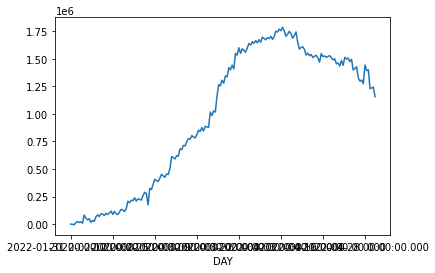

In [55]:
delta_cumsum[560].plot(kind='line')